In [46]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import fft 

In [47]:
def wavenum(i, N) : return (i + N // 2) % N - N // 2

In [48]:
# Direct convolution between 
def d_conv(W, X):
    # for i in range(0, len(W)):/A
        
    return (X * W)

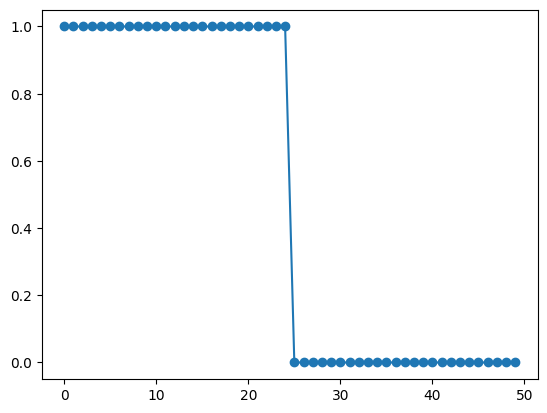

In [49]:
n = 50
x = np.arange(n)
x0 = n * 0.5
X = x < x0
X = np.array(X)
plt.plot(x,X, marker ='o')

In [50]:
# # Integrate function:
# from sympy import *
# t = Symbol('t')

# integrate(1/2 + 1/2 cos(pi*t/3))

/tmp/ipykernel_4644/3937254632.py:9: RuntimeWarning: invalid value encountered in double_scalars
  H[i] = (np.sin(3*a/2))/a - (3 * np.pi * np.cos(3 * a/2))/(9 * a**2 - np.pi**2)


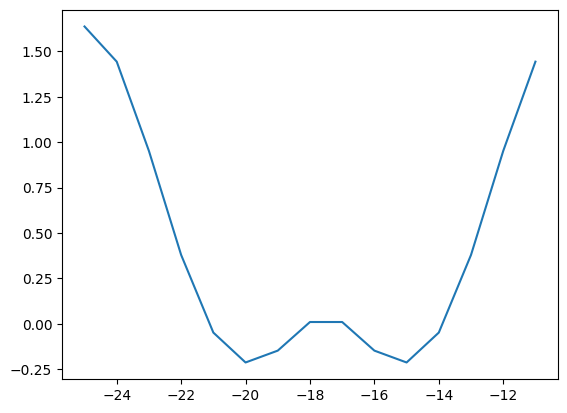

In [51]:
# Create filter.
filter_size = 15
delta = 10.2
M = 3/2
H = np.zeros(filter_size, dtype=complex)
for i in range(filter_size):
    k = wavenum(i,filter_size)
    a = 2 * np.pi / filter_size * k * M    
    H[i] = (np.sin(3*a/2))/a - (3 * np.pi * np.cos(3 * a/2))/(9 * a**2 - np.pi**2)

H[0] = 3/2 + 3/np.pi
# H /= 3/2

# H = fft.fftshift(H)
plt.plot(np.arange(filter_size) - n//2, H)

M is  2
fs:  -3.4125422505876395e-17 1.0237626751762921e-16


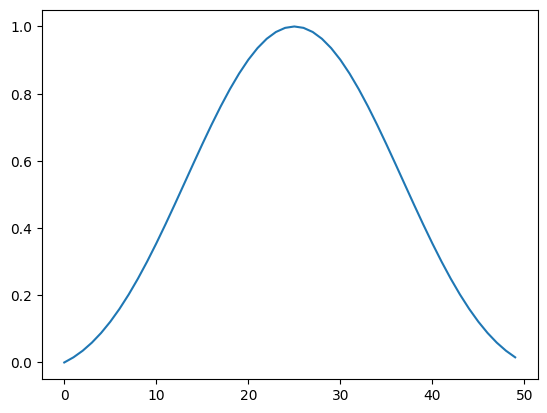

In [52]:
# #lanczos smoothing
G = np.zeros(n)
M = 0
#we pick the support of the smoothing window depending on the fractional shift
mydistance = np.abs(np.mod(delta, 1) - 0.5)
if mydistance < 0.5 - 0.03125:
    M = 1
if mydistance < 0.5 - 0.0125:
    M = 2
if mydistance < 0.5 - 0.25:
    M = 3
print("M is ", M)
if M:
    for i in range(n):
        k = wavenum(i,n)
        a = 2 * np.pi / n * k * M
        #weighted average of (1/2 + 1/2 cos(pi / M * x))
        if True:
            if 4 * k == -n or 4 * k == n:
                G[i] += 1
            else:
                G[i] += 2 * a * np.sin(a) / (np.pi**2 - a**2)
        if True:
            if i:
                G[i] += 2 * np.sin(a) / (a)
            else:
                G[i] += 2
        G[i] *= 0.5
        if k == -n//2 :
            print("fs: ", G[i], np.sin(-a) / -a)
else :
    G = np.ones(n)
    
    
    
G = np.fft.fftshift(G)
plt.plot(np.arange(n), G)

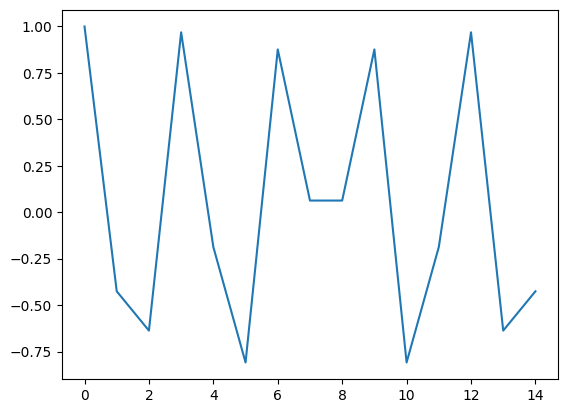

In [53]:
#Shift
L = np.zeros(filter_size, dtype=complex)
for i in range(filter_size):
    L[i] = np.exp(-2j * np.pi * delta * wavenum(i,filter_size) /filter_size)
plt.plot(np.arange(filter_size), L)

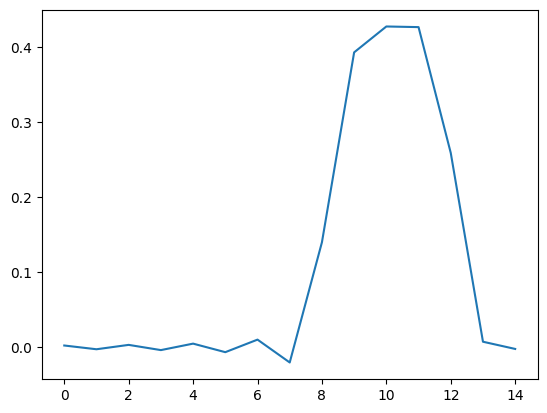

In [54]:
z = np.fft.ifft(H * L )
plt.plot(np.arange(filter_size),z)

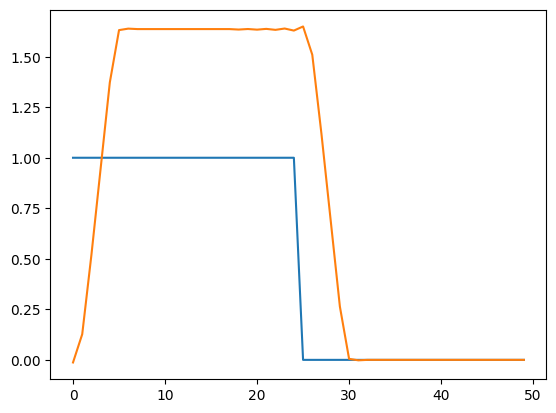

In [55]:
# Apply filter to each point of y
# h = np.fft.ifft(H)

x_shifted_filter = np.zeros(n, dtype=complex)

x_shifted_filter = np.convolve(X,z, 'same')
# x_shifted_filter /= 

# x_shifted_filter = convolve_1d(x_shifted, H)

# for i in range(n):
#     A = 0   
    
#     # At the beginning
#     if i - M//2 < 0:
#         for j in range(n - M // 2, n):
#             A += X[j] * h[j % M]
#         for j in range(0, M // 2):
#             A += X[j] * h[j % M]
#         # print(i)
            
            
#     # At the end
#     elif i + M // 2 > n:
#         for j in range(i - M // 2, n):
#             A += X[j] * h[j % M]
#         for j in range(0, M // 2):
#             A += X[j] * h[j % M]
#         # print(i)
        
#     # In the middle.
#     elif i > M // 2 and i + M // 2  < n:
#         for j in range(i - M//2, i + M//2):
#             A += X[j] * h[j % M] 
            
#         # print(i)
#     x_shifted_filter[i] = A

# x_shifted_filter /= M
plt.plot(x,X)
# plt.plot(x,x_shifted.real)
plt.plot(x,x_shifted_filter)